In [1]:
cd

/Users/mdjavedulferdous


In [2]:
cd "Documents/Dataset/New Dataset"

/Users/mdjavedulferdous/Documents/Dataset/New Dataset


In [16]:
import csv
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.metrics import precision_score,average_precision_score,confusion_matrix, recall_score, accuracy_score, classification_report, make_scorer
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as PLT


In [4]:
#csv_df = pd.read_csv("sort_file_corrected_v4.csv")
#csv_df = pd.read_csv("test_div_2_2.csv")
#csv_df = pd.read_csv("pageList_version_three.csv")
csv_df = pd.read_csv("filterList_version_one.csv")

In [5]:
csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207269 entries, 0 to 207268
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   checkBoxList   207269 non-null  int64 
 1   NumberOfLink   207269 non-null  int64 
 2   NumberOfInput  207269 non-null  int64 
 3   filterClass    207269 non-null  int64 
 4   name_url       207269 non-null  object
dtypes: int64(4), object(1)
memory usage: 7.9+ MB


In [6]:
X = csv_df[['checkBoxList','NumberOfLink','NumberOfInput']]
y = csv_df[['filterClass']]


In [7]:
filtered_one = csv_df[csv_df['filterClass'] == 1] 
filtered_zero = csv_df[csv_df['filterClass'] == 0] 


In [8]:
print(filtered_zero.count())
print(filtered_one.count())

checkBoxList     205648
NumberOfLink     205648
NumberOfInput    205648
filterClass      205648
name_url         205648
dtype: int64
checkBoxList     1621
NumberOfLink     1621
NumberOfInput    1621
filterClass      1621
name_url         1621
dtype: int64


In [9]:
f_o = filtered_zero.sample(n=1621,replace=False)
z = pd.concat([filtered_one, f_o], axis=0)
x_2 = z[['checkBoxList','NumberOfLink','NumberOfInput']]
y_2 = z[["filterClass"]]

In [10]:
print(x_2.count())
print(y_2.count())

checkBoxList     3242
NumberOfLink     3242
NumberOfInput    3242
dtype: int64
filterClass    3242
dtype: int64


In [11]:
'''
Parameters:

estimator: estimator object implementing ‘fit’

X: Xarray-like of shape (n_samples, n_features). The data to fit. Can be for example a list, or an array.

y: yarray-like of shape (n_samples,) or (n_samples, n_outputs), default=None. The target variable to try to predict in the case of supervised learning.

'''

cv = KFold(n_splits=3, random_state=1, shuffle=True)
target_names = ['Class 0', 'Class 1']

model = LogisticRegression()
model2 = svm.SVC(kernel='rbf')

def classification_report_with_accuracy_score(y_true, y_pred):

    print("--------------------------------------------------------")
    print(metrics.classification_report(y_true, y_pred, digits=2, target_names=target_names))
    #print(confusion_matrix(y_true, y_pred))
    tp, fn, fp, tn = confusion_matrix(y_true, y_pred).reshape(-1)
    print('Outcome values : \ntp, fn, fp, tn\n', tp, fn, fp, tn)
    return accuracy_score(y_true, y_pred)

print("========================================================")
print("LogisticRegression")
print("========================================================")
lgnested_score = cross_val_score(model, X=x_2, y=y_2, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
lgavg_score = "{:.3f}".format(np.mean(lgnested_score)*100)
print("Average accuracy: ", lgavg_score)

print("========================================================")
print("SVM with RBF kernel")
print("========================================================")
'''
fig = PLT.figure()
ax1 = fig.add_subplot(211)
ax1.plot(lgnested_score)
PLT.show()
'''
dtnested_score = cross_val_score(model2, X=x_2, y=y_2, cv=cv, \
               scoring=make_scorer(classification_report_with_accuracy_score))
dtavg_score = "{:.3f}".format(np.mean(dtnested_score)*100)
print("Average accuracy: ", dtavg_score)
print("========================================================")
'''
fig = PLT.figure()
ax2 = fig.add_subplot(211)
ax2.plot(dtnested_score)
PLT.show()
'''

LogisticRegression
--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.86      1.00      0.92       516
     Class 1       1.00      0.85      0.92       565

    accuracy                           0.92      1081
   macro avg       0.93      0.92      0.92      1081
weighted avg       0.93      0.92      0.92      1081

Outcome values : 
tp, fn, fp, tn
 516 0 86 479
--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.86      1.00      0.92       558
     Class 1       1.00      0.83      0.90       523

    accuracy                           0.92      1081
   macro avg       0.93      0.91      0.91      1081
weighted avg       0.93      0.92      0.91      1081

Outcome values : 
tp, fn, fp, tn
 558 0 91 432
--------------------------------------------------------
              precision    recall  f1-score   support

     Cl

/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expec

--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.77      1.00      0.87       547
     Class 1       1.00      0.69      0.81       533

    accuracy                           0.85      1080
   macro avg       0.88      0.84      0.84      1080
weighted avg       0.88      0.85      0.84      1080

Outcome values : 
tp, fn, fp, tn
 547 0 167 366
Average accuracy:  84.917


'\nfig = PLT.figure()\nax2 = fig.add_subplot(211)\nax2.plot(dtnested_score)\nPLT.show()\n'

--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.85      1.00      0.92       431
     Class 1       1.00      0.83      0.91       434

    accuracy                           0.91       865
   macro avg       0.93      0.91      0.91       865
weighted avg       0.93      0.91      0.91       865

Outcome values : 
tp, fn, fp, tn
 431 0 74 360
--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.85      1.00      0.92       436
     Class 1       1.00      0.83      0.91       428

    accuracy                           0.91       864
   macro avg       0.93      0.91      0.91       864
weighted avg       0.93      0.91      0.91       864

Outcome values : 
tp, fn, fp, tn
 436 0 74 354
--------------------------------------------------------
              precision    recall  f1-score   support

     Class 0       0.86   

/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mdjavedulferdous/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was p

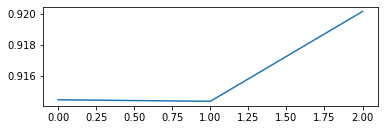

In [23]:
X_train,X_validation, Y_train, Y_validation = model_selection.train_test_split(x_2,y_2,test_size=0.20)
models = []
models.append(('LogisticRegression', LogisticRegression()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', svm.SVC(kernel='rbf')))
results = []
names = []
print("================================================================")
for name, model in models:
    kfold = KFold(n_splits=3, random_state=0)
    clf = model.fit(X_train, Y_train)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
    results.append(cv_results)
    names.append(name)
    #print("================================================================")
    #print("Average scores of the estimator for each run of the cross validation.")
    #msg = "Testing score for %s: is %f" % (name, cv_results.mean()*100)
    print(msg)
    print("================================================================")
    #print("The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.")
    print("Accuracy for %s is %f" % (name , accuracy_score(Y_validation, model.predict(X_validation))*100))
    print("================================================================")
    prediction = clf.predict(X_validation)
    print ('Recall:', recall_score(Y_validation, prediction))
    print ('Precision:', precision_score(Y_validation, prediction) )  
    fig = PLT.figure()
    ax1 = fig.add_subplot(211)
    ax1.plot(cv_results)
    PLT.show()

https://github.com/Msanjayds/Machine_Learning_Projects/blob/master/2.%20CrossValidation.ipynb
    
https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f
    
https://stackoverflow.com/questions/42263915/using-sklearn-cross-val-score-and-kfolds-to-fit-and-help-predict-model